In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets, applications, optimizers
import matplotlib.pyplot as plt

In [16]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
num_classes = 10

In [18]:
(x_train, y_train), (x_test, y_test) = datasets.cifar100.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
num_classes = 100

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [19]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [20]:
CONFIGURATIONS = [
    {'optimizer': optimizers.RMSprop()},
    {'optimizer': optimizers.Adam()},
    {'optimizer': optimizers.SGD(momentum=0.9)},
]

In [21]:
def build_resnet50_transfer_learning(input_shape, num_classes):
    base_model = applications.ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze the base model

    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=base_model.input, outputs=x)
    return model

In [22]:
results_resnet50 = {}

for config in CONFIGURATIONS:
    opt = config['optimizer']
    config_key = f'ResNet-50 ({opt.__class__.__name__})'
    print(f'Training {config_key}')

    resnet50_model = build_resnet50_transfer_learning((32, 32, 3), num_classes)
    resnet50_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    history_resnet50 = resnet50_model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))
    resnet50_model.save(f'resnet50_{opt.__class__.__name__}.h5')

    loss_resnet50, acc_resnet50 = resnet50_model.evaluate(x_test, y_test)
    results_resnet50[config_key] = (history_resnet50.history, acc_resnet50)
    print(f'Test Accuracy for {config_key}: {acc_resnet50:.4f}')

Training ResNet-50 (RMSprop)
Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 53ms/step - accuracy: 0.0136 - loss: 4.6644 - val_accuracy: 0.0274 - val_loss: 4.5374
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.0248 - loss: 4.5151 - val_accuracy: 0.0360 - val_loss: 4.4267
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.0421 - loss: 4.3997 - val_accuracy: 0.0546 - val_loss: 4.3161
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.0551 - loss: 4.3035 - val_accuracy: 0.0611 - val_loss: 4.2584
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.0638 - loss: 4.2379 - val_accuracy: 0.0682 - val_loss: 4.2128
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.0718 - loss: 4.1991 - val_accuracy: 0.0725 - val_loss: 4.1805
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.0745 - loss: 4.1647 - val_accuracy: 0.0714 - val_loss: 4.1802
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.0988 - loss: 4.0169
Test Accuracy for ResNet-50 (RMSprop): 0.0963
Training ResNet-50 (Adam)
Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.0146 - loss: 4.6625 - val_accuracy: 0.0248 - val_loss: 4.5225
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.0300 - loss: 4.4769 - val_accuracy: 0.0426 - val_loss: 4.3779
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.0514 - loss: 4.3420 - val_accuracy: 0.0581 - val_loss: 4.2739
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.0605 - loss: 4.2539 - val_accuracy: 0.0626 - val_loss: 4.2394
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.0669 - loss: 4.2131 - val_accuracy: 0.0691 - val_loss: 4.2114
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.0727 - loss: 4.1828 - val_accuracy: 0.0739 - val_loss: 4.1764
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.0757 - l

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.1035 - loss: 3.9779
Test Accuracy for ResNet-50 (Adam): 0.1027
Training ResNet-50 (SGD)
Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.0098 - loss: 4.6688 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.0101 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.0089 - loss: 4.6054 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.0088 - loss: 4.6054 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.0098 - loss: 4.6053 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.0095 - loss: 4.6054 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.0095 - loss: 

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.0090 - loss: 4.6052
Test Accuracy for ResNet-50 (SGD): 0.0100


In [13]:
def plot_comparisons_cifa10(results):
    plt.figure(figsize=(12, 6))
    for key, (history, acc) in results.items():
        plt.plot(history['val_accuracy'], label=f'{key} (Final Acc: {acc:.4f})')

    plt.xlabel('Epochs')
    plt.ylabel('Validation Accuracy')
    plt.legend()
    plt.title('Comparison of ResNet-50 Transfer Learning with Different Optimizers in CIFAR-10 dataset')
    plt.show()

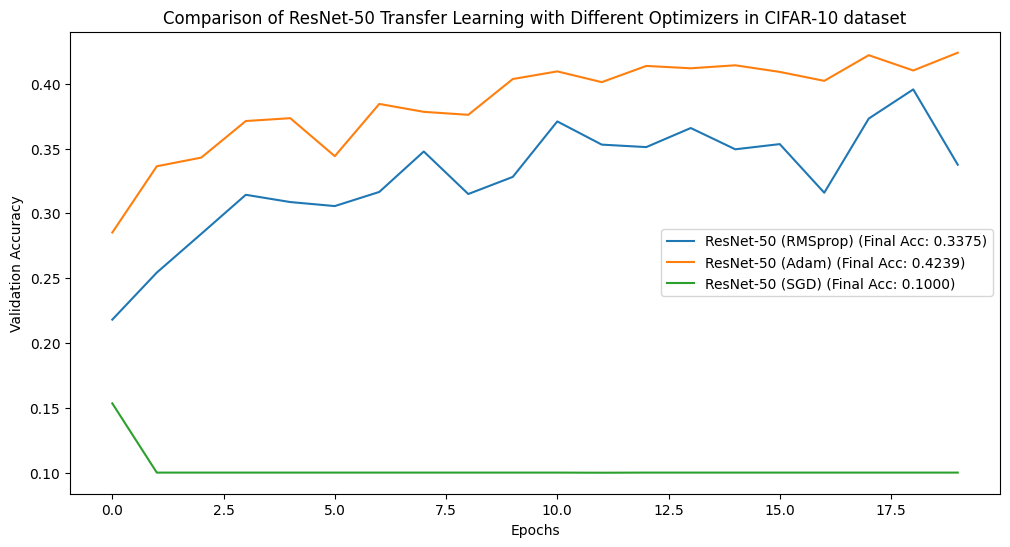

In [14]:
plot_comparisons_cifa10(results_resnet50)

In [23]:
def plot_comparisons_cifa100(results):
    plt.figure(figsize=(12, 6))
    for key, (history, acc) in results.items():
        plt.plot(history['val_accuracy'], label=f'{key} (Final Acc: {acc:.4f})')

    plt.xlabel('Epochs')
    plt.ylabel('Validation Accuracy')
    plt.legend()
    plt.title('Comparison of ResNet-50 Transfer Learning with Different Optimizers in CIFAR-100 dataset')
    plt.show()

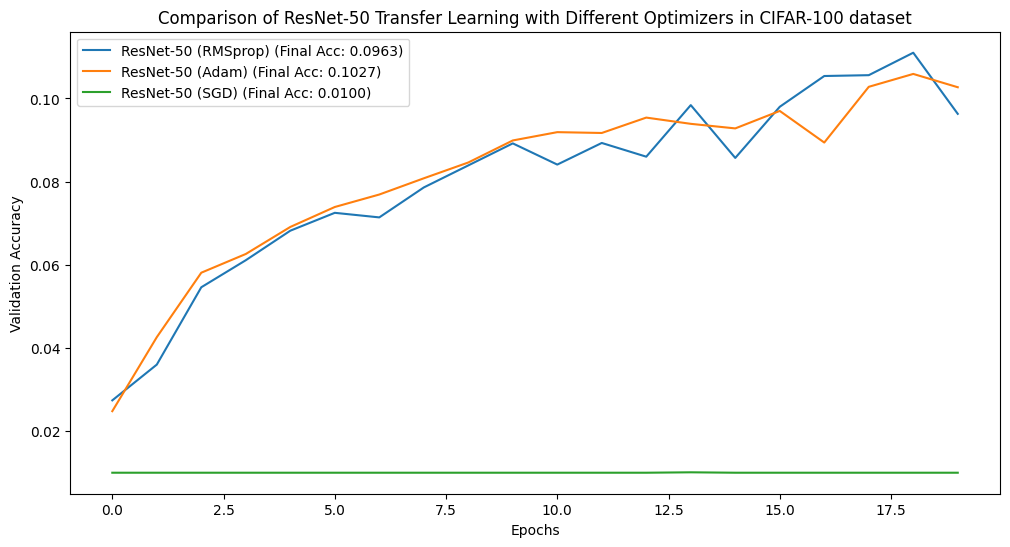

In [24]:
plot_comparisons_cifa100(results_resnet50)